In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset_path = ("keyword_issue.xlsx")
keyword_data = pd.read_excel(dataset_path)

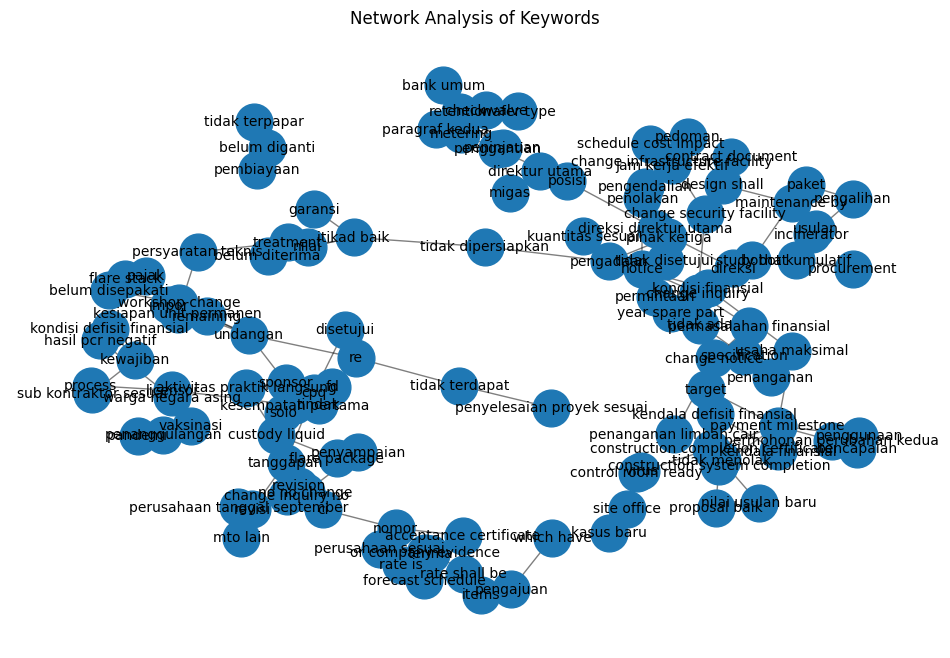

In [4]:
# Creating a network graph
G = nx.Graph()

# Adding nodes and edges from the data
for _, row in keyword_data.iterrows():
    # Adding nodes for each keyword
    G.add_node(row['key_1'], level=1, score=row['score_1'])
    G.add_node(row['key_2'], level=2, score=row['score_2'])
    G.add_node(row['key_3'], level=3, score=row['score_3'])

    # Adding edges between the nodes, weighted by the average of their scores
    avg_score_12 = (row['score_1'] + row['score_2']) / 2
    avg_score_23 = (row['score_2'] + row['score_3']) / 2
    G.add_edge(row['key_1'], row['key_2'], weight=avg_score_12)
    G.add_edge(row['key_2'], row['key_3'], weight=avg_score_23)

# Visualizing the network
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)

# labels
nx.draw_networkx_labels(G, pos, font_size=10, font_family="sans-serif")

plt.title("Network Analysis of Keywords")
plt.axis("off")
plt.show()
